In [77]:
import requests
import time
import random
import os 
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns



#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from requests.models import Response
from string import ascii_lowercase
from urllib.request import urlopen
from bs4 import BeautifulSoup

**last.fm API to retrieve top x songs by genre (tag)**

Application name	educational - no application
API key	e8934c6a9bbb9395fb830b15a53f2916
Shared secret	6d093f7d7b4b55ea5008303a24cd2ca5
Registered to	pajamasam29

send user to last.fm/api/auth/?api_key=xxx


 /2.0/?method=tag.gettoptracks&tag=disco&api_key=YOUR_API_KEY&format=json

In [6]:
api_key = "e8934c6a9bbb9395fb830b15a53f2916"
#end_point = 'last.fm/api/auth/'

end_point = "http://ws.audioscrobbler.com/2.0/"

def get_songs_from_lastfm(tag, number_of_songs):
    response = requests.get('http://ws.audioscrobbler.com/2.0/?method=tag.gettoptracks&tag='+tag+'&limit='+str(number_of_songs)+'&api_key=e8934c6a9bbb9395fb830b15a53f2916&format=json').json()
    collection = response['tracks']['track']
    song_list = []
    for song in collection:
        #print(song['name'])
        title = song['name']
        artist = song['artist']['name']
        song_list.append(title)
    return song_list
    #return collection
    #return {'title':title, 'artist':artist}

Include artist?

In [3]:
def get_songs_artists_from_lastfm(tag, number_of_songs):
    response = requests.get('http://ws.audioscrobbler.com/2.0/?method=tag.gettoptracks&tag='+tag+'&limit='+str(number_of_songs)+'&api_key=e8934c6a9bbb9395fb830b15a53f2916&format=json').json()
    collection = response['tracks']['track']
    song_data = []
    for song in collection:
        #print(song['name'])
        title = song['name']
        artist = song['artist']['name']
        duration = song['duration']
        song_data.append({'title':title, 'artist':artist, 'duration':duration})
    #return collection
    return song_data

# return collection if you want to view what else is available to pull



In [220]:
get_songs_artists_from_lastfm('rap', 10)

[{'title': 'Stronger', 'artist': 'Kanye West', 'duration': '314'},
 {'title': 'Heartless', 'artist': 'Kanye West', 'duration': '209'},
 {'title': 'Clint Eastwood', 'artist': 'Gorillaz', 'duration': '339'},
 {'title': 'Hey Ya!', 'artist': 'OutKast', 'duration': '233'},
 {'title': 'Ms. Jackson', 'artist': 'OutKast', 'duration': '271'},
 {'title': 'In Da Club', 'artist': '50 Cent', 'duration': '193'},
 {'title': 'Without Me', 'artist': 'Eminem', 'duration': '290'},
 {'title': 'The Real Slim Shady', 'artist': 'Eminem', 'duration': '284'},
 {'title': 'It Was A Good Day', 'artist': 'Ice Cube', 'duration': '267'},
 {'title': 'Best I Ever Had', 'artist': 'Drake', 'duration': '257'}]

In [77]:

info = []
for song in get_songs_artists_from_lastfm('country', 175):
    info.append(song)
info_df = pd.DataFrame(info)
info_df

#info_df['artist'].value_counts()

,title,artist,duration
0,Hurt,Johnny Cash,218
1,Wake Me Up,Avicii,246
2,Love Story,Taylor Swift,233
3,You Belong with Me,Taylor Swift,231
4,Ring of Fire,Johnny Cash,156
...,...,...,...
170,I've Just Seen a Face,The Beatles,128
171,Hey Stephen (Taylor’s Version),Taylor Swift,0
172,Starlight (Taylor's Version),Taylor Swift,0
173,Daddy Lessons,Beyoncé,0


In [197]:
get_songs_from_lastfm('rap',175)

info = []
for song in get_songs_from_lastfm('rap', 175):
    info.append(song)
print(info)

info_df = pd.DataFrame(info)
print(info_df)

['Stronger', 'Heartless', 'Clint Eastwood', 'Hey Ya!', 'Ms. Jackson', 'In Da Club', 'Without Me', 'The Real Slim Shady', 'It Was A Good Day', 'Best I Ever Had', 'See You Again (feat. Kali Uchis)', 'HUMBLE.', 'Flashing Lights', 'Gold Digger', 'All of the Lights', "Can't Tell Me Nothing", 'Still D.R.E.', 'Lose Yourself', 'Power', 'Money Trees', "Gangsta's Paradise", 'I Wonder', 'Earfquake', 'Bound 2', 'Starships', 'Stressed Out', 'Stan', 'Super Bass', 'Kiss Me More (feat. SZA)', 'Pump It', 'The Next Episode', 'Mockingbird', 'Alright', 'Lollipop', 'Sunflower - Spider-Man: Into the Spider-Verse', 'Father Stretch My Hands Pt. 1', 'Love The Way You Lie', "Can't Hold Us (feat. Ray Dalton)", 'All The Stars (with SZA)', 'Slow dancing in the dark', 'DNA.', 'Runaway', 'NEW MAGIC WAND', '7 rings', 'PRIDE.', 'Woman', 'Candy Shop', 'No Role Modelz', 'Hate it or love it', 'nights', 'Beautiful Girls', 'Dark Horse', 'Replay', 'Boom Boom Pow', 'The Way I Are', 'Love Lockdown', 'LOVE. FEAT. ZACARI.', "Bo

In [193]:
top100rap = get_songs_from_lastfm('rap', '175')
print(top100rap)
print(len(top100rap))

['Stronger', 'Heartless', 'Clint Eastwood', 'Hey Ya!', 'Ms. Jackson', 'In Da Club', 'Without Me', 'The Real Slim Shady', 'It Was A Good Day', 'Best I Ever Had', 'See You Again (feat. Kali Uchis)', 'HUMBLE.', 'Flashing Lights', 'Gold Digger', 'All of the Lights', "Can't Tell Me Nothing", 'Still D.R.E.', 'Lose Yourself', 'Power', 'Money Trees', "Gangsta's Paradise", 'I Wonder', 'Earfquake', 'Bound 2', 'Starships', 'Stressed Out', 'Stan', 'Super Bass', 'Kiss Me More (feat. SZA)', 'Pump It', 'The Next Episode', 'Mockingbird', 'Alright', 'Lollipop', 'Sunflower - Spider-Man: Into the Spider-Verse', 'Father Stretch My Hands Pt. 1', 'Love The Way You Lie', "Can't Hold Us (feat. Ray Dalton)", 'All The Stars (with SZA)', 'Slow dancing in the dark', 'DNA.', 'Runaway', 'NEW MAGIC WAND', '7 rings', 'PRIDE.', 'Woman', 'Candy Shop', 'No Role Modelz', 'Hate it or love it', 'nights', 'Beautiful Girls', 'Dark Horse', 'Replay', 'Boom Boom Pow', 'The Way I Are', 'Love Lockdown', 'LOVE. FEAT. ZACARI.', "Bo

In [161]:
top100country = get_songs_from_lastfm('country', 100)
print(top100country)

['Hurt', 'Wake Me Up', 'Love Story', 'You Belong with Me', 'Ring of Fire', 'Lover', 'Jolene', 'We Are Never Ever Getting Back Together', 'Motion Sickness', 'I Walk the Line', 'I Will Wait', 'Love Story (Taylor’s Version)', 'I Knew You Were Trouble.', 'FourFiveSeconds', 'willow', 'Nonsense', 'This Is the Life', 'The Climb', 'Enchanted', 'You Belong With Me (Taylor’s Version)', 'Hey Brother', 'Not Fair', 'Take Me Home, Country Roads', 'Perfect', "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)", 'Before He Cheats', '9 to 5', 'Mariners Apartment Complex', 'Our Song', '22', 'Folsom Prison Blues', 'Nobody Gets Me', 'Timber (feat. Ke$ha)', "I Knew You Were Trouble (Taylor's Version)", 'Back to December', 'Life Is a Highway', "Lookin' Out My Back Door", 'BETTY', 'Shallow', "We Are Never Ever Getting Back Together (Taylor's Version)", 'Angels Like You', 'Mine', "22 (Taylor's Version)", 'Need You Now', 'Old Town Road - Remix', "Red (Taylor's Version)", 'lacy', 'Jesus, Etc.'

In [164]:
top100pop = get_songs_from_lastfm('pop', 100)
print(top100pop)


['Feel Good Inc.', 'Yellow', 'Viva la Vida', 'Poker Face', 'The Scientist', 'Somebody Told Me', 'Kids', 'Wonderwall', 'Billie Jean', 'Pumped Up Kicks', 'Clocks', 'Heartless', 'Take on Me', 'Bad Romance', 'Rolling in the Deep', 'Fix You', 'Toxic', 'I Kissed a Girl', 'Somebody That I Used To Know', 'Just Dance', 'Clint Eastwood', 'Back to Black', 'Everybody Wants to Rule the World', 'Paparazzi', 'Chasing Cars', 'Umbrella', 'Losing My Religion', 'Dog Days Are Over', 'Hey Ya!', 'Summertime Sadness', 'Paper Planes', 'Somewhere Only We Know', 'The Less I Know the Better', 'Every Breath You Take', "I'm Yours", 'Hot n Cold', 'I Gotta Feeling', 'This Love', "Friday I'm in Love", 'Dancing Queen', 'Ms. Jackson', 'Beat It', 'Crazy', "Boys Don't Cry", 'Video Games', 'Blinding Lights', 'Someone Like You', 'All I Want for Christmas Is You', 'Just Like Heaven', 'DARE', 'Rehab', "Don't Stop the Music", 'Island in the Sun', 'Royals', 'Africa', 'How to Save a Life', 'Thriller', 'Take Me to Church', 'Call

list

**Retrieving data from acclaimedmusic.net txt files**


In [2]:
def read_lines_from_file(filename):
    '''Read lines from a file'''
    with open(filename, 'r', encoding='utf8') as file:  # Open in read mode
        lines = file.read().splitlines() # split lines removes the \n at the end of each line
        #lines = file.readlines()       # Read all lines into a list
    return lines

read_lines_from_file("Rock.txt")

['Bob Dylan - Like a Rolling Stone',
 'Nirvana - Smells Like Teen Spirit',
 'The Beatles - A Day In The Life - Remastered',
 'Chuck Berry - Johnny B Goode',
 "The Rolling Stones - (I Can't Get No) Satisfaction - Mono Version / Remastered 2002",
 'Elvis Presley - Heartbreak Hotel',
 'Bruce Springsteen - Born to Run',
 'The Who - My Generation - Original Mono Version',
 'Joy Division - Love Will Tear Us Apart',
 'Sex Pistols - Anarchy In The UK - Remastered 2012',
 'The Clash - London Calling',
 'The Rolling Stones - Sympathy For The Devil',
 'Little Richard - Tutti Frutti',
 'Led Zeppelin - Stairway To Heaven',
 'David Bowie - Heroes - 1999 Remaster',
 'Prince - When Doves Cry',
 'Pulp - Common People',
 'The Rolling Stones - Gimme Shelter',
 'The Kinks - You Really Got Me',
 'The White Stripes - Seven Nation Army',
 'R.E.M. - Losing My Religion',
 'Sex Pistols - God Save The Queen',
 'Queen - Bohemian Rhapsody - Remastered 2011',
 'New Order - Blue Monday',
 'Jimi Hendrix - Purple Haze

In [3]:
rock_song_list = read_lines_from_file("Rock.txt")
hiphop_song_list = read_lines_from_file("Hiphop.txt")
country_song_list = read_lines_from_file("Country.txt")
rnb_song_list = read_lines_from_file("RnB.txt")
singersongwriter_song_list = read_lines_from_file("SingerSongwriter.txt")
pop_song_list = read_lines_from_file("Pop.txt")

In [5]:
hiphop_song_list

['M.I.A. - Paper Planes',
 'Grandmaster Flash & The Furious Five - The Message (feat. Melle Mel & Duke Bootee)',
 'Missy Elliott - Get Ur Freak On',
 'Beck - Loser',
 'Public Enemy - Fight The Power',
 'Kendrick Lamar - Alright',
 'JAY-Z - 99 Problems',
 'Beyoncé - Formation',
 'Kanye West - Runaway',
 "The Sugarhill Gang - Rapper's Delight - Long Version",
 'Run–D.M.C. - Walk This Way (feat. Aerosmith)',
 'JAY-Z - Empire State Of Mind [Jay-Z + Alicia Keys]',
 'Dr. Dre - Nuthin\' But A "G" Thang',
 'Outkast - Ms. Jackson',
 'Childish Gambino - This Is America',
 'Afrika Bambaataa - Planet Rock',
 'M.I.A. - Bad Girls',
 'Beastie Boys - Sabotage - 2009 Digital Remaster',
 'Eminem - Lose Yourself - Soundtrack Version',
 'Azealia Banks - 212',
 'Outkast - B.O.B. - Bombs Over Baghdad',
 'Kanye West - Gold Digger',
 'Kanye West - Jesus Walks',
 'Eminem - Stan',
 'Public Enemy - Bring The Noise',
 'Cardi B - Bodak Yellow',
 'Kendrick Lamar - HUMBLE.',
 'Kendrick Lamar - King Kunta',
 'Beastie

In [44]:
#len(rock_song_list)
#len(hiphop_song_list)
#len(country_song_list)
#len(rnb_song_list)
#len(singersongwriter_song_list)

1191

In [7]:
def song_list_to_df(song_list, genre):
    '''Inputs song list and returns a data frame with artist and song tite'''
    artists = []
    titles = []
    for song in song_list:
        info = song.split(' - ')
        artists.append(info[0])
        titles.append(info[1])
    genre = [genre] * len(artists)
    df = pd.DataFrame({'artist': artists, 'title': titles, 'genre': genre})
    return df

In [8]:
rock_df = song_list_to_df(rock_song_list[:300], "Rock")
hiphop_df = song_list_to_df(hiphop_song_list[:300], "Hiphop")
country_df = song_list_to_df(country_song_list[:300], "Country")
rnb_df = song_list_to_df(rnb_song_list[:300], "RnB")
singersongwriter_df = song_list_to_df(singersongwriter_song_list[:300], "Singer/Songwriter")
pop_df = song_list_to_df(pop_song_list[:300], "Pop")

In [9]:
hiphop_df

,artist,title,genre
0,M.I.A.,Paper Planes,Hiphop
1,Grandmaster Flash & The Furious Five,The Message (feat. Melle Mel & Duke Bootee),Hiphop
2,Missy Elliott,Get Ur Freak On,Hiphop
3,Beck,Loser,Hiphop
4,Public Enemy,Fight The Power,Hiphop
...,...,...,...
295,T La Rock,It's Yours (Radio Mix),Hiphop
296,Kanye West,Good Life,Hiphop
297,Ludacris,Southern Hospitality (Featuring Pharrell),Hiphop
298,The Streets,Has It Come to This?,Hiphop


In [8]:
rock_df

,artist,title,genre
0,Bob Dylan,Like a Rolling Stone,Rock
1,Nirvana,Smells Like Teen Spirit,Rock
2,The Beatles,A Day In The Life,Rock
3,Chuck Berry,Johnny B Goode,Rock
4,The Rolling Stones,(I Can't Get No) Satisfaction,Rock
...,...,...,...
145,The Velvet Underground,Sweet Jane,Rock
146,Michael Jackson,Beat It,Rock
147,Pink Floyd,Wish You Were Here,Rock
148,Beastie Boys,Sabotage,Rock


Need a way to combat duplicates in genres

In [166]:
mask = ~rock_df['title'].isin(pop_df['title'])
mask
rock_df_filtered =  rock_df[mask]
rock_df_filtered['artist'].value_counts()

artist
Led Zeppelin         51
AC/DC                30
Metallica            30
Nirvana              27
Jimi Hendrix         25
                     ..
Joan Armatrading      1
Australian Crawl      1
Sputniks              1
Kim Gordon            1
Human Flotsam         1
Name: count, Length: 2183, dtype: int64

Look into this more..

In [6]:
rock_df['artist'].value_counts()

artist
The Beatles               16
The Rolling Stones        11
David Bowie                9
Elvis Presley              7
The Velvet Underground     5
                          ..
Roxy Music                 1
The Killers                1
Van Morrison               1
Johnny Cash                1
Pearl Jam                  1
Name: count, Length: 174, dtype: int64

## Turning song artist/titles to URLs

In [13]:
def clean_text(text):
    '''Removes special characters and blank spaces in text and returns in lowercase'''
    text = text.replace("é", "e")
    regex = re.compile('[^A-Za-z0-9_]')
    text = "".join(re.split("\(|\)|\[|\]", text)[::2])
    text = regex.sub('', text)
    text = text.lower()
    return text

<>:5: SyntaxWarning: invalid escape sequence '\('
<>:5: SyntaxWarning: invalid escape sequence '\('
C:\Users\jclar\AppData\Local\Temp\ipykernel_17992\208064812.py:5: SyntaxWarning: invalid escape sequence '\('
  text = "".join(re.split("\(|\)|\[|\]", text)[::2])


In [14]:
def create_url(df = pd.DataFrame, index = int):
    '''Create song URL based on song title and artist found using the index in data frame'''
    title = df["title"][index] 
    title = clean_text(title)

    artist = df["artist"][index]
    artist = clean_text(artist)

    url = f"http://azlyrics.com/lyrics/{artist}/{title}.html"
    return url


print(create_url(pop_df, 219))
    
    

http://azlyrics.com/lyrics/clairo/bags.html


**Saving URLs to data frame**

In [10]:
hiphop_df["URL"] = pd.NA # create  new column with NA as placeholder value
pop_df["URL"] = pd.NA

hiphop_df["URL"] = hiphop_df.apply(lambda row: create_url(hiphop_df, row.name), axis=1) 
pop_df["URL"] = pop_df.apply(lambda row: create_url(pop_df, row.name), axis=1) 


In [12]:
hiphop_df

,artist,title,genre,URL
0,M.I.A.,Paper Planes,Hiphop,http://azlyrics.com/lyrics/mia/paperplanes.html
1,Grandmaster Flash & The Furious Five,The Message (feat. Melle Mel & Duke Bootee),Hiphop,http://azlyrics.com/lyrics/grandmasterflashthe...
2,Missy Elliott,Get Ur Freak On,Hiphop,http://azlyrics.com/lyrics/missyelliott/geturf...
3,Beck,Loser,Hiphop,http://azlyrics.com/lyrics/beck/loser.html
4,Public Enemy,Fight The Power,Hiphop,http://azlyrics.com/lyrics/publicenemy/fightth...
...,...,...,...,...
295,T La Rock,It's Yours (Radio Mix),Hiphop,http://azlyrics.com/lyrics/tlarock/itsyours.html
296,Kanye West,Good Life,Hiphop,http://azlyrics.com/lyrics/kanyewest/goodlife....
297,Ludacris,Southern Hospitality (Featuring Pharrell),Hiphop,http://azlyrics.com/lyrics/ludacris/southernho...
298,The Streets,Has It Come to This?,Hiphop,http://azlyrics.com/lyrics/thestreets/hasitcom...


In [34]:
hiphop_df.loc[8]

artist                                           Kanye West
title                                               Runaway
genre                                                Hiphop
URL       http://azlyrics.com/lyrics/kanyewest/runaway.html
lyrics                                                 <NA>
Name: 8, dtype: object

SOME ISSUES:

Beyonce = beyonceknowles
Missy Elliot = missymisdemeanorelliot

## Scraping

In [13]:
def get_lyrics(song_url):
    '''When given a URL, scrape song lyrics from AZLyrcs'''
    song = urlopen(song_url)
    soup = BeautifulSoup(song.read(), "html.parser")
    lyrics = soup.find_all("div")[22].get_text()
    return lyrics


In [16]:
test = get_lyrics('https://www.azlyrics.com/lyrics/youngthug/hercules.html')
print(test)



Thugger
The Thugger, baby, yeah
(Young Metro, Young Metro, Young Metro)
Metro! Hee
Young Metro, Young Metro, Young Metro
And what?
(Metro Boomin want some more, nigga)

Shit, shoot him in his back like Ricky but not Slick
Spent like seven bands on a tri-color pit
All my signs red like a stop, nigga, no pit
I'm on the purple, nigga, high like fuckin' Martians, whoa
In a foreign yesterday, I was just walkin', whoa
Left my baby mama, now my bitch a Barbie, whoa
All-red Dickies suit, I'm ridin' down Slauson, whoa (skrt)
Yeah, yeah, yeah, yeah
Hercu-Hercules (whoa, yeah, yeah, hey, hey)
Hercu-Hercules (heeh, heeh, yay, heeh, heeh)
Hercu-Hercules (ooh, yah, yaaaaah, yeah, yeah)
Hercu-Hercules (I got, I got, I got lean)

I smoke gas, that's that Hercules (strong marijuana)
She looked at him, oh, now she watchin' me (Bitch likes my persona)
Bitch, I'm speedin' to that guapanese (skrrt)
Old Chevy mounted up, I can't forget the T
Drop the top, shoot birds at the officers (fuck 'em)
Fuck them b

In [17]:
print(get_lyrics('https://www.azlyrics.com/lyrics/youngthug/meorus.html'))



So excited for... so what're you recording?
It's a new song, I'ma let you hear a little bit
Play it

Well this is why-a-why-a-why
Well this is why-a-why-a-why
Well this is why-a-why-a-why

Who you loyal to? Me or us?
Who you trust the most? Me or us?
Who you wanna fuck every night? Me or us?
Who you wanna take on your flight? Me or us?

Ow!
You the one that said you were doin' it
And you said you were doin' it, you're doin' it, you're doin' it
You say that what you're doin', you're doin', you're doin'
You told me that what, what you're doin', you're doin', you're doin'
What would you do?
If your brother left you, what would you do?
If them niggas came for you, you better pursue (Watch out)
I just spent ten racks on a dog from Germany, no Purdue
Oops, I meant Dupri, jewelry sitting on A/C
Yeah, yeah, yeah
I wanna know, tell me lil' baby, I wanna know
I wanna know
I got the show, fuck my show, be my show (What)
I got them loafs, I'm with Metro, he got some more (Yeah)
I don't gotta tal

**Scraping via loop**

In [25]:
#hiphop_df["lyrics"] = pd.NA # create  new column with NA as placeholder value
pop_df["lyrics"] = pd.NA
country_df["lyrics"] = pd.NA
rnb_df["lyrics"] = pd.NA
singersongwriter_df["lyrics"] = pd.NA
rock_df["lyrics"] = pd.NA

In [31]:
pip install requests-ip-rotator

  Obtaining dependency information for requests-ip-rotator from https://files.pythonhosted.org/packages/81/ba/b4cb6e9f56cdc6c17cab92424d079f4085e21c3b021c47bc5d09484ba4f6/requests_ip_rotator-1.0.14-py3-none-any.whl.metadata
  Obtaining dependency information for boto3 from https://files.pythonhosted.org/packages/57/b3/a24f18691976dee1b326d78d40599fd4dbff22ece639ad37060f68ac4a35/boto3-1.34.110-py3-none-any.whl.metadata
  Obtaining dependency information for botocore<1.35.0,>=1.34.110 from https://files.pythonhosted.org/packages/c1/1e/46ee82e14410f998e2b008cf325a7aa3b0f518195efcb3f1228b656b62b2/botocore-1.34.110-py3-none-any.whl.metadata
  Obtaining dependency information for jmespath<2.0.0,>=0.7.1 from https://files.pythonhosted.org/packages/31/b4/b9b800c45527aadd64d5b442f9b932b00648617eb5d63d2c7a6587b7cafc/jmespath-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for s3transfer<0.11.0,>=0.10.0 from https://files.pythonhosted.org/packages/83/37/395cdb6ee92925fa211e55d8


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\jclar\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [33]:
import requests
from requests_ip_rotator import ApiGateway, EXTRA_REGIONS


gateway = ApiGateway("http://azlyrics.com/lyrics/")
gateway.start()

session = requests.Session()
session.mount("http://azlyrics.com/lyrics/", gateway)

response = session.get("https://www.azlyrics.com/lyrics/youngthug/meorus.html")
print(response.status_code)

Starting API gateways in 10 regions.


NoCredentialsError: Unable to locate credentials

In [26]:
counter = 0

test = []

for url in range(0,len(pop_df)):
    time.sleep(3)
    #counter += 1
    #if counter % 2 != 0: # every 10 iterations, add a delay to scraping
    print(url)
    try:
        pop_df.loc[url, "lyrics"] = get_lyrics(str(pop_df["URL"][url]))            
    except Exception: 
        print(f"No lyrics for {pop_df['URL'][url]}")

        

        
    

0
No lyrics for http://azlyrics.com/lyrics/thebeatles/adayinthelife.html
1
No lyrics for http://azlyrics.com/lyrics/thebeachboys/goodvibrations.html
2
No lyrics for http://azlyrics.com/lyrics/theronettes/bemybaby.html
3
4
5
6
No lyrics for http://azlyrics.com/lyrics/thebeachboys/godonlyknows.html
7
8
No lyrics for http://azlyrics.com/lyrics/thebeatles/strawberryfieldsforever.html
9
10
11
12
No lyrics for http://azlyrics.com/lyrics/beyonce/crazyinlove.html
13
14
15
No lyrics for http://azlyrics.com/lyrics/thejackson5/iwantyouback.html
16
No lyrics for http://azlyrics.com/lyrics/therighteousbrothers/youvelostthatlovinfeelin.html
17
No lyrics for http://azlyrics.com/lyrics/thebeatles/heyjude.html
18
No lyrics for http://azlyrics.com/lyrics/thekinks/waterloosunset.html
19
No lyrics for http://azlyrics.com/lyrics/thesmiths/thereisalightthatnevergoesout.html
20
21
22
No lyrics for http://azlyrics.com/lyrics/thebyrds/mrtambourineman.html
23
No lyrics for http://azlyrics.com/lyrics/theverve/bi

KeyboardInterrupt: 

In [27]:
#get_lyrics('http://azlyrics.com/lyrics/mia/paperplanes.html')
pop_df

,artist,title,genre,URL,lyrics
0,The Beatles,A Day In The Life,Pop,http://azlyrics.com/lyrics/thebeatles/adayinth...,<NA>
1,The Beach Boys,Good Vibrations (Mono),Pop,http://azlyrics.com/lyrics/thebeachboys/goodvi...,<NA>
2,The Ronettes,Be My Baby,Pop,http://azlyrics.com/lyrics/theronettes/bemybab...,<NA>
3,Marvin Gaye,I Heard It Through The Grapevine,Pop,http://azlyrics.com/lyrics/marvingaye/iheardit...,\n\r\nI bet you're wonderin' how I knew\n'Bout...
4,Michael Jackson,Billie Jean,Pop,http://azlyrics.com/lyrics/michaeljackson/bill...,\n\r\nShe was more like a beauty queen\nFrom a...
...,...,...,...,...,...
295,Everything But The Girl,Missing,Pop,http://azlyrics.com/lyrics/everythingbutthegir...,<NA>
296,Smokey Robinson & The Miracles,The Tears Of A Clown,Pop,http://azlyrics.com/lyrics/smokeyrobinsonthemi...,<NA>
297,Tom Petty,Free Fallin',Pop,http://azlyrics.com/lyrics/tompetty/freefallin...,<NA>
298,Sonny & Cher,I Got You Babe,Pop,http://azlyrics.com/lyrics/sonnycher/igotyouba...,<NA>


In [28]:
#hiphop_df.to_csv("hiphopdf_withlyrics.csv")
pop_df.to_csv("popdf_withlyrics.csv")


In [41]:
hiphop_df_imported = pd.read_csv('hiphopdf_withlyrics.csv')
pop_df_imported = pd.read_csv('popdf_withlyrics.csv')
rock_df_imported = pd.read_csv('rockdf_withlyrics.csv')
rnb_df_imported = pd.read_csv('rnbdf_withlyrics.csv')
singersongwriter_df_imported = pd.read_csv('singersongwriterdf_withlyrics.csv')
country_df_imported = pd.read_csv('countrydf_withlyrics.csv')

Remove the songs that do not have lyrics.

In [42]:
pop_df_imported = pop_df_imported[pop_df_imported['lyrics'].notna()]
hiphop_df_imported = hiphop_df_imported[hiphop_df_imported['lyrics'].notna()]
rock_df_imported = rock_df_imported[rock_df_imported['lyrics'].notna()]
rnb_df_imported = rnb_df_imported[rnb_df_imported['lyrics'].notna()]
singersongwriter_df_imported = singersongwriter_df_imported[singersongwriter_df_imported['lyrics'].notna()]
country_df_imported = country_df_imported[country_df_imported['lyrics'].notna()]

Add all genres to one large data frame. Only add the first 100 songs per genre.

In [54]:
song_lyric_df = pd.concat([hiphop_df_imported[0:100], rock_df_imported[0:100], country_df_imported[0:100], pop_df_imported[0:100], rnb_df_imported[0:100], singersongwriter_df_imported[0:100]])
song_lyric_df = song_lyric_df.drop('Unnamed: 0', axis = 'columns')
song_lyric_df

,artist,title,genre,URL,lyrics
0,M.I.A.,Paper Planes,Hiphop,http://azlyrics.com/lyrics/mia/paperplanes.html,"\n\r\nI fly like paper, get high like planes\n..."
3,Beck,Loser,Hiphop,http://azlyrics.com/lyrics/beck/loser.html,\n\r\nIn the time of chimpanzees\nI was a monk...
4,Public Enemy,Fight The Power,Hiphop,http://azlyrics.com/lyrics/publicenemy/fightth...,"\n\r\n""Yet our best trained, best educated, be..."
5,Kendrick Lamar,Alright,Hiphop,http://azlyrics.com/lyrics/kendricklamar/alrig...,"\n\n[Kendrick Lamar:]\nAlls my life, I has to ..."
6,JAY-Z,99 Problems,Hiphop,http://azlyrics.com/lyrics/jayz/99problems.html,"\n\r\nIf you're having girl problems, I feel b..."
...,...,...,...,...,...
108,Gram Parsons,Return of the Grievous Angel,Singer/Songwriter,http://azlyrics.com/lyrics/gramparsons/returno...,\n\r\nWon't you scratch my itch sweet Annie Ri...
109,Phil Ochs,I Ain't Marching Anymore,Singer/Songwriter,http://azlyrics.com/lyrics/philochs/iaintmarch...,"\n\r\nOh, I marched to the battle of New Orlea..."
110,Neil Diamond,Sweet Caroline,Singer/Songwriter,http://azlyrics.com/lyrics/neildiamond/sweetca...,\n\r\nWhere it began\nI can't begin to knowin'...
111,Bob Dylan,Shelter from the Storm,Singer/Songwriter,http://azlyrics.com/lyrics/bobdylan/shelterfro...,\n\r\n'Twas in another lifetime one of toil an...


In [66]:
def text_preprocessing(uncleaned_text):
      review = re.sub('[^a-zA-Z]', ' ',uncleaned_text)
      review = review.lower()
      review = review.split()
      ps = PorterStemmer()
      all_stopwords = stopwords.words('english')
      all_stopwords.remove('not')
      review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
      review = ' '.join(review)
      return review

**Cleaning lyrics and adding the cleaned lyrics to a new column in the overall dataframe. Also doing this for individual genres only so I can view the genre specific word frequency chart**

In [88]:
song_lyric_df['CleanedLyrics'] = song_lyric_df['lyrics'].apply(text_preprocessing)
hiphop_df_imported['CleanedLyrics'] = hiphop_df_imported['lyrics'].apply(text_preprocessing)
pop_df_imported['CleanedLyrics'] = pop_df_imported['lyrics'].apply(text_preprocessing)
country_df_imported['CleanedLyrics'] = country_df_imported['lyrics'].apply(text_preprocessing)
rock_df_imported['CleanedLyrics'] = rock_df_imported['lyrics'].apply(text_preprocessing)
rnb_df_imported['CleanedLyrics'] = rnb_df_imported['lyrics'].apply(text_preprocessing)
singersongwriter_df_imported['CleanedLyrics'] = singersongwriter_df_imported['lyrics'].apply(text_preprocessing)

In [68]:
song_lyric_df["CleanedLyrics"][0]
song_lyric_df

,artist,title,genre,URL,lyrics,CleanedLyrics
0,M.I.A.,Paper Planes,Hiphop,http://azlyrics.com/lyrics/mia/paperplanes.html,"\n\r\nI fly like paper, get high like planes\n...",fli like paper get high like plane catch borde...
3,Beck,Loser,Hiphop,http://azlyrics.com/lyrics/beck/loser.html,\n\r\nIn the time of chimpanzees\nI was a monk...,time chimpanze monkey butan vein cut junki pla...
4,Public Enemy,Fight The Power,Hiphop,http://azlyrics.com/lyrics/publicenemy/fightth...,"\n\r\n""Yet our best trained, best educated, be...",yet best train best educ best equip best prepa...
5,Kendrick Lamar,Alright,Hiphop,http://azlyrics.com/lyrics/kendricklamar/alrig...,"\n\n[Kendrick Lamar:]\nAlls my life, I has to ...",kendrick lamar all life fight nigga all life h...
6,JAY-Z,99 Problems,Hiphop,http://azlyrics.com/lyrics/jayz/99problems.html,"\n\r\nIf you're having girl problems, I feel b...",girl problem feel bad son got problem bitch on...
...,...,...,...,...,...,...
108,Gram Parsons,Return of the Grievous Angel,Singer/Songwriter,http://azlyrics.com/lyrics/gramparsons/returno...,\n\r\nWon't you scratch my itch sweet Annie Ri...,scratch itch sweet anni rich welcom back town ...
109,Phil Ochs,I Ain't Marching Anymore,Singer/Songwriter,http://azlyrics.com/lyrics/philochs/iaintmarch...,"\n\r\nOh, I marched to the battle of New Orlea...",oh march battl new orlean end earli british wa...
110,Neil Diamond,Sweet Caroline,Singer/Songwriter,http://azlyrics.com/lyrics/neildiamond/sweetca...,\n\r\nWhere it began\nI can't begin to knowin'...,began begin knowin know growin strong spring s...
111,Bob Dylan,Shelter from the Storm,Singer/Songwriter,http://azlyrics.com/lyrics/bobdylan/shelterfro...,\n\r\n'Twas in another lifetime one of toil an...,twa anoth lifetim one toil blood black virtu r...


## Exploratory Data Analysis

In [69]:
song_lyric_df['genre'].value_counts()


genre
Hiphop               100
Rock                 100
Country              100
Pop                  100
RnB                  100
Singer/Songwriter    100
Name: count, dtype: int64

This shows there are an even amount of songs per genre

In [83]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word", color = "purple") 
  ax.set(ylabel = 'Word', xlabel = "Count") 
  plt.show()

**Top words across all genres**

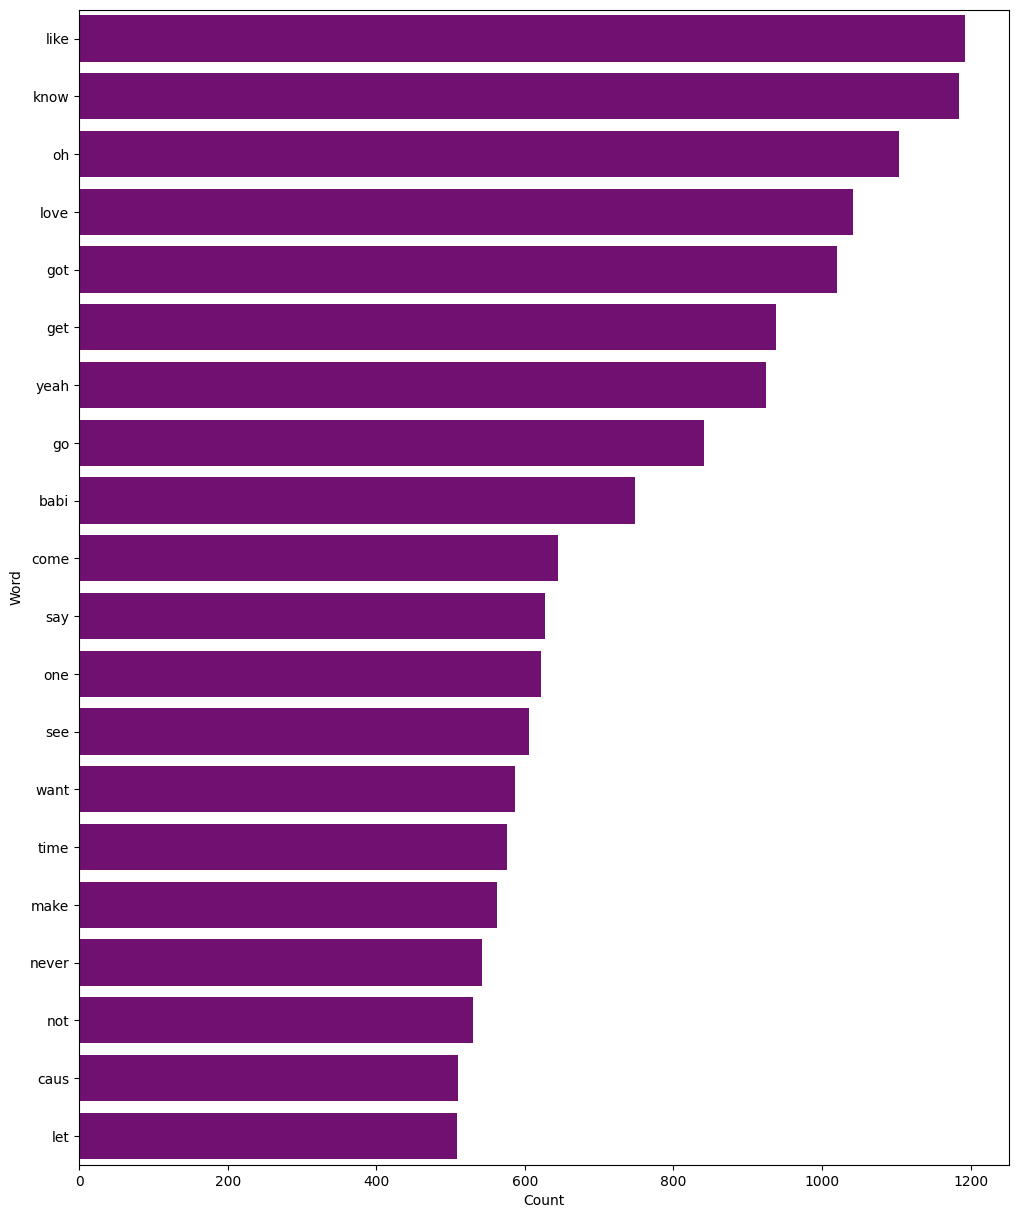

In [84]:
freq_words(song_lyric_df['CleanedLyrics'], 20)

**Top words across Hiphop**

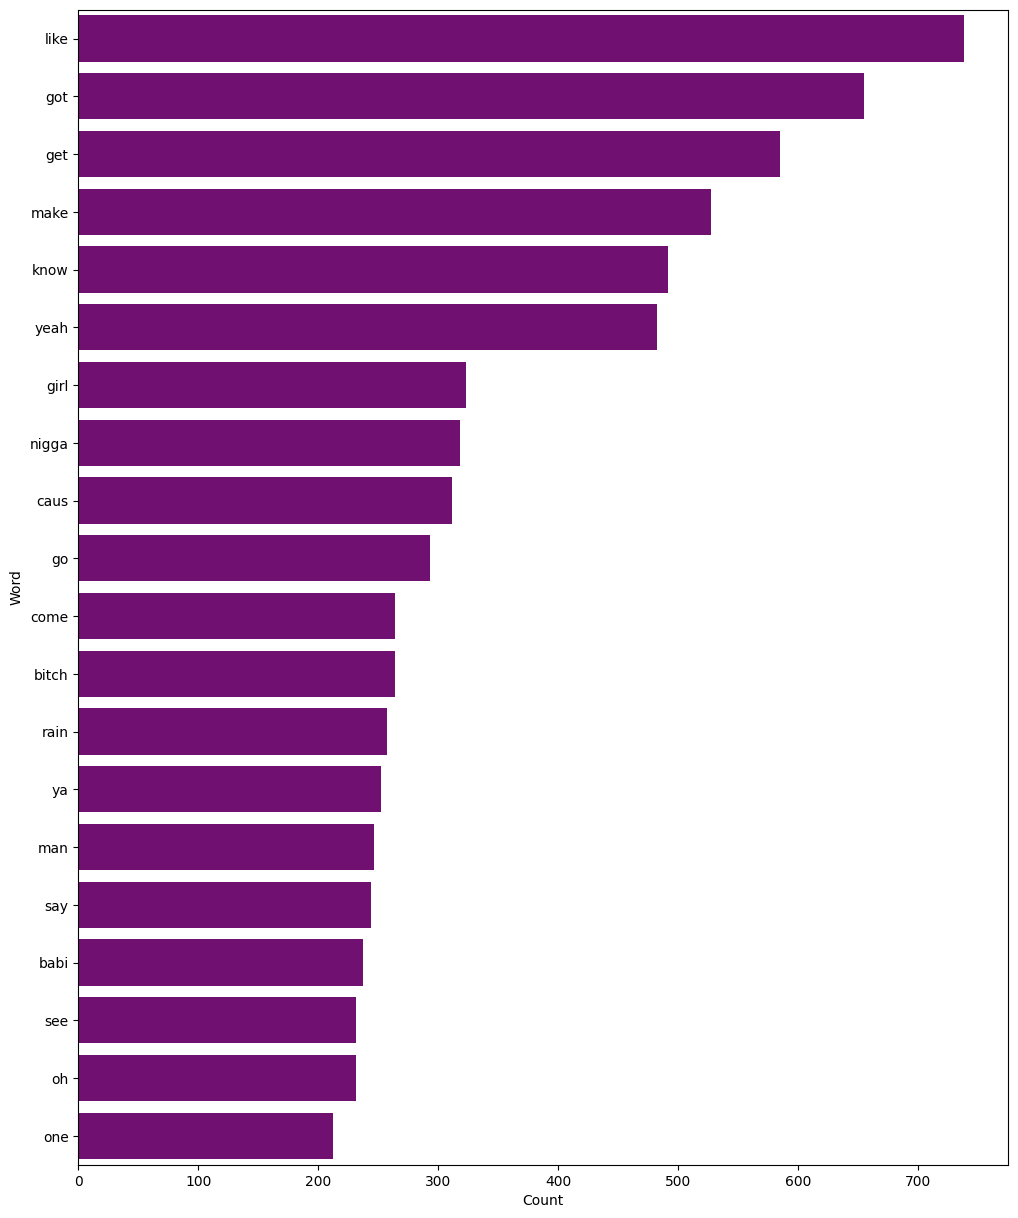

In [85]:
freq_words(hiphop_df_imported['CleanedLyrics'], 20)

**Country most spoken words**

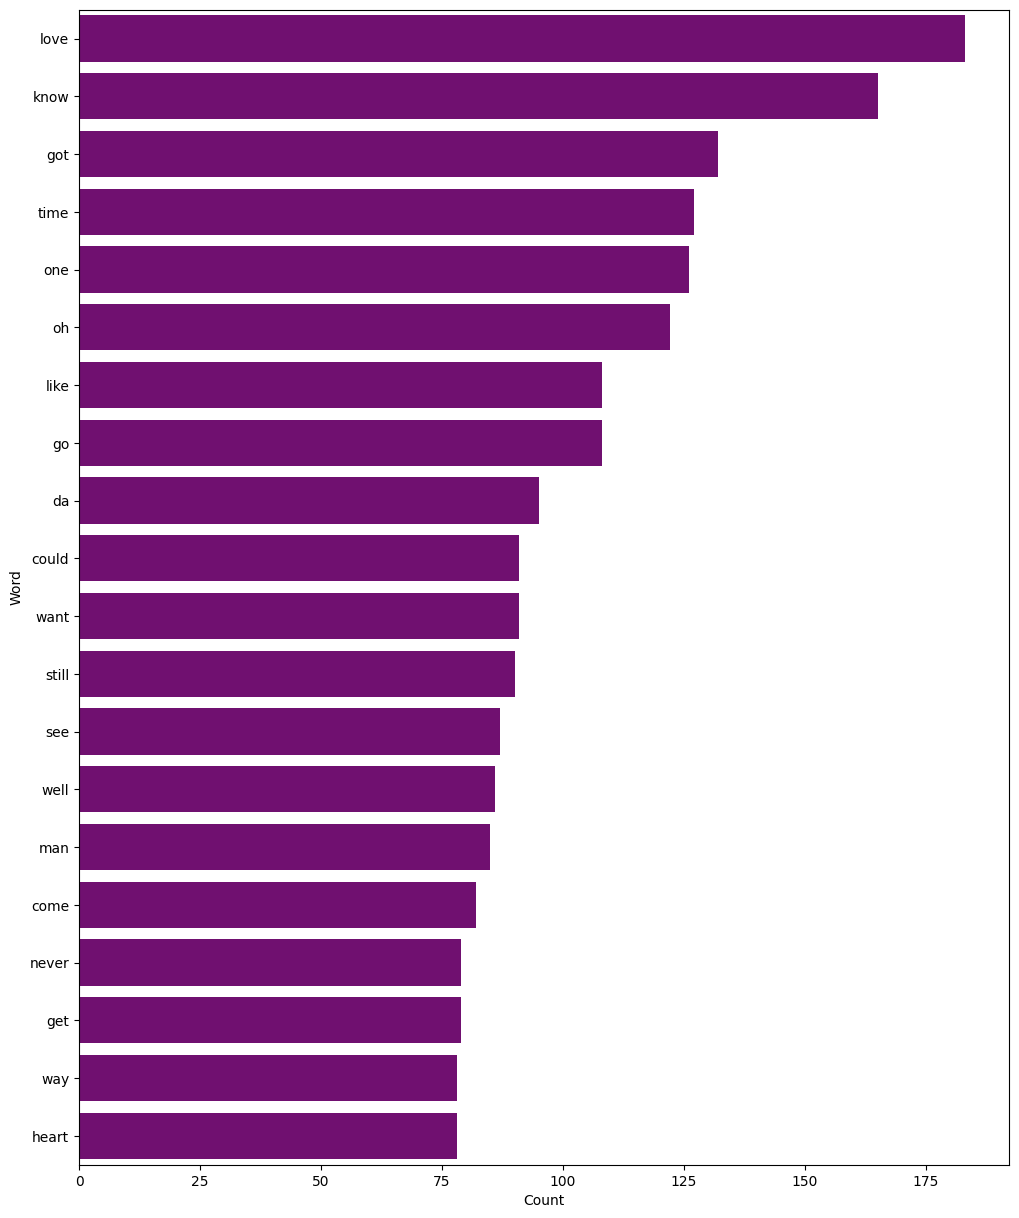

In [89]:
freq_words(country_df_imported['CleanedLyrics'], 20)

**Pop most spoken words**

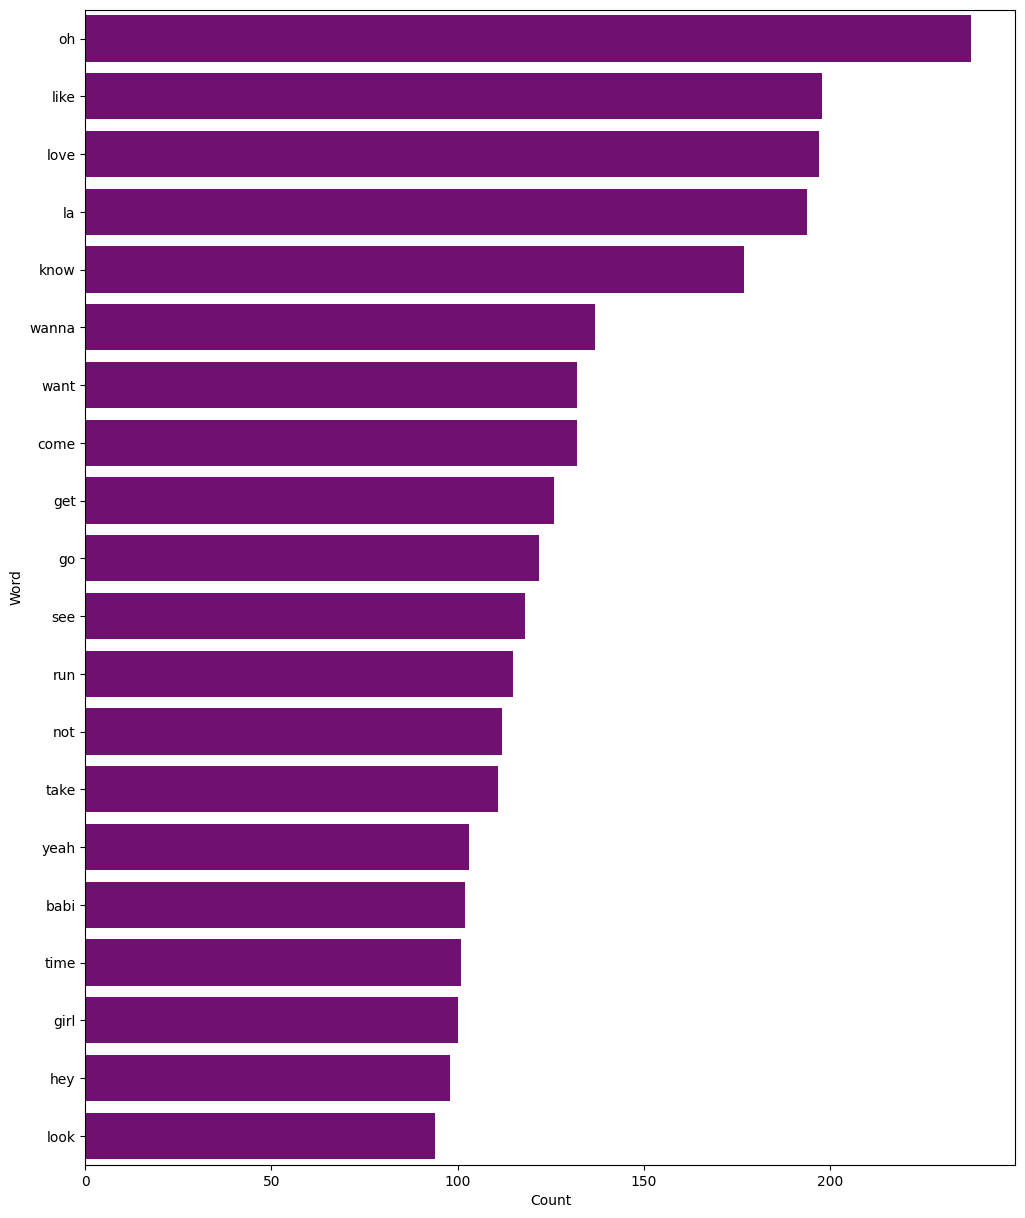

In [90]:
freq_words(pop_df_imported['CleanedLyrics'], 20)

**Rock most spoken words**

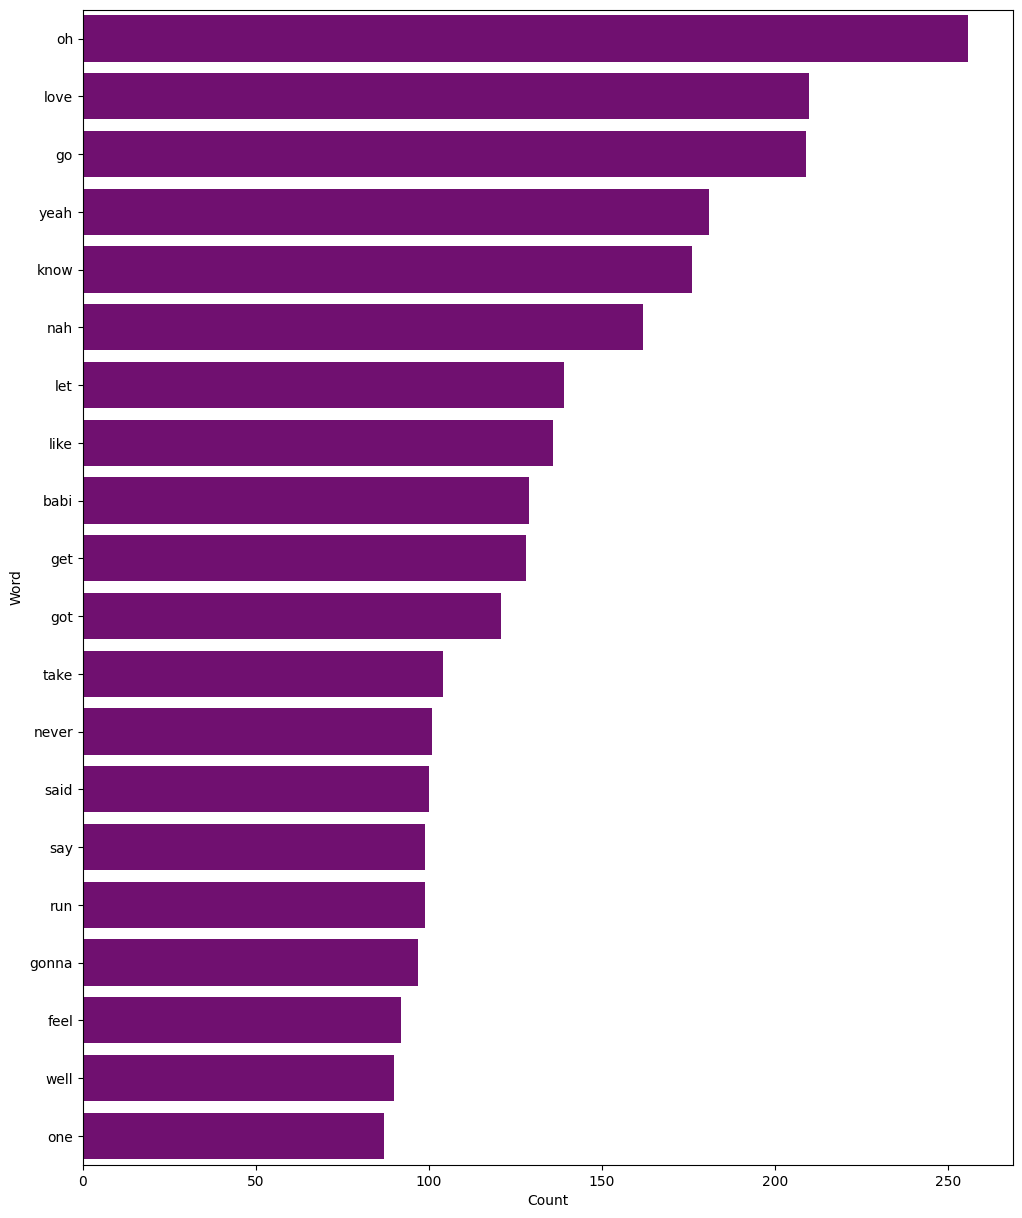

In [91]:
freq_words(rock_df_imported['CleanedLyrics'], 20)

**Singer songwriter most spoken words**

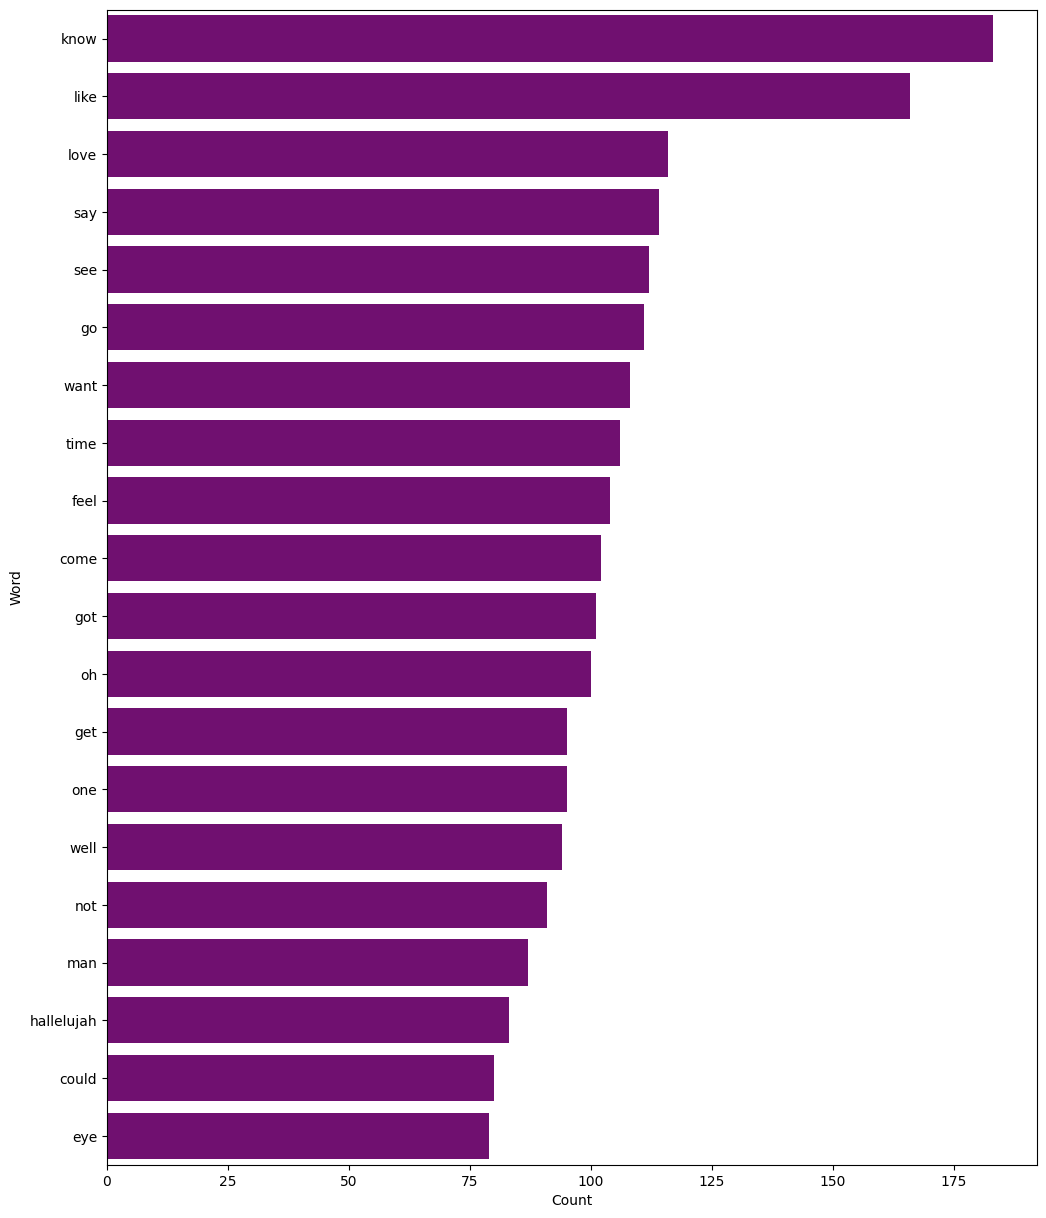

In [93]:
freq_words(singersongwriter_df_imported['CleanedLyrics'], 20)

**RnB most spoken words**

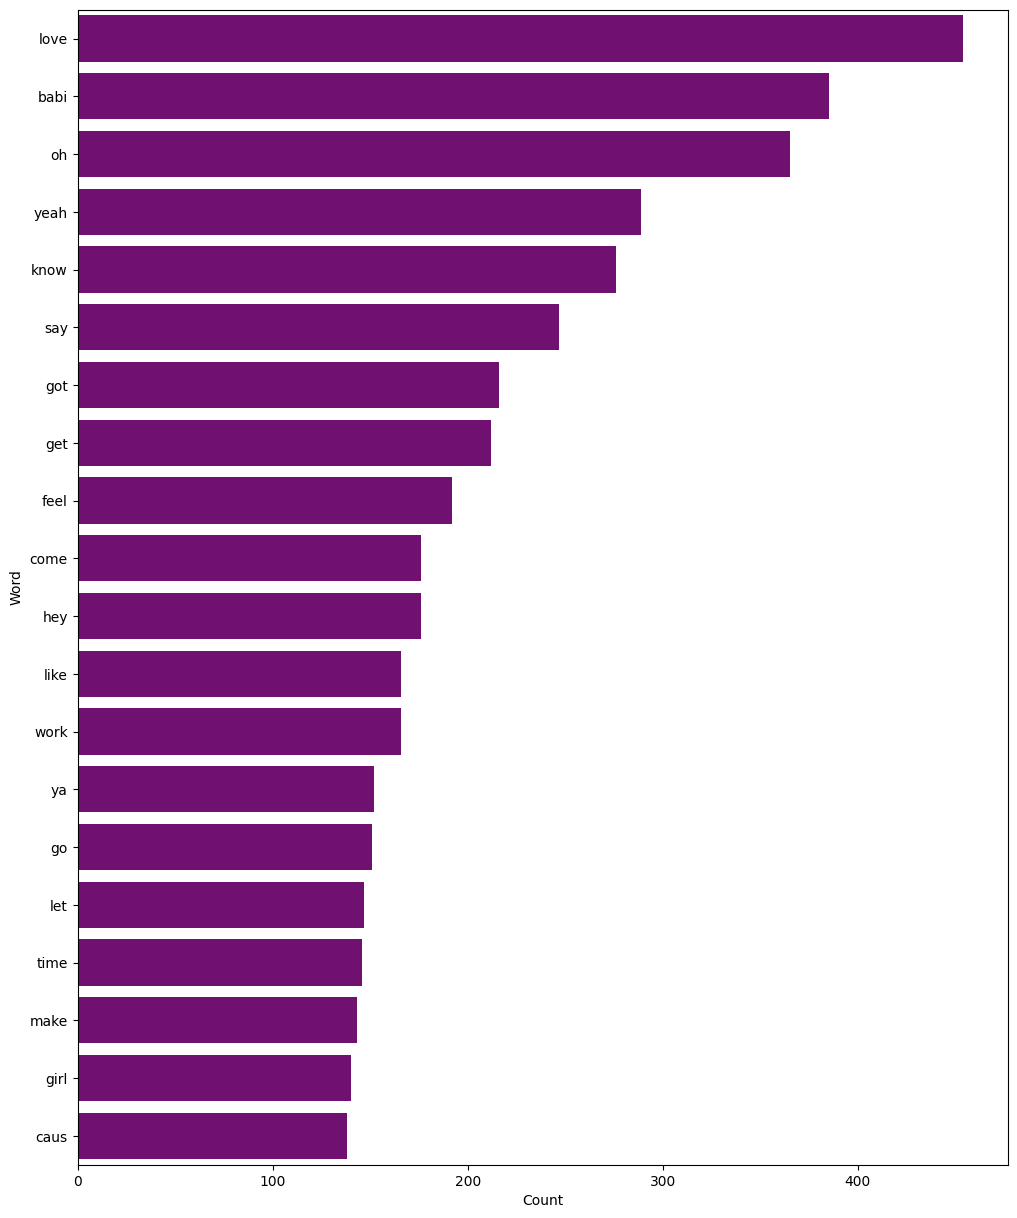

In [94]:
freq_words(rnb_df_imported['CleanedLyrics'], 20)